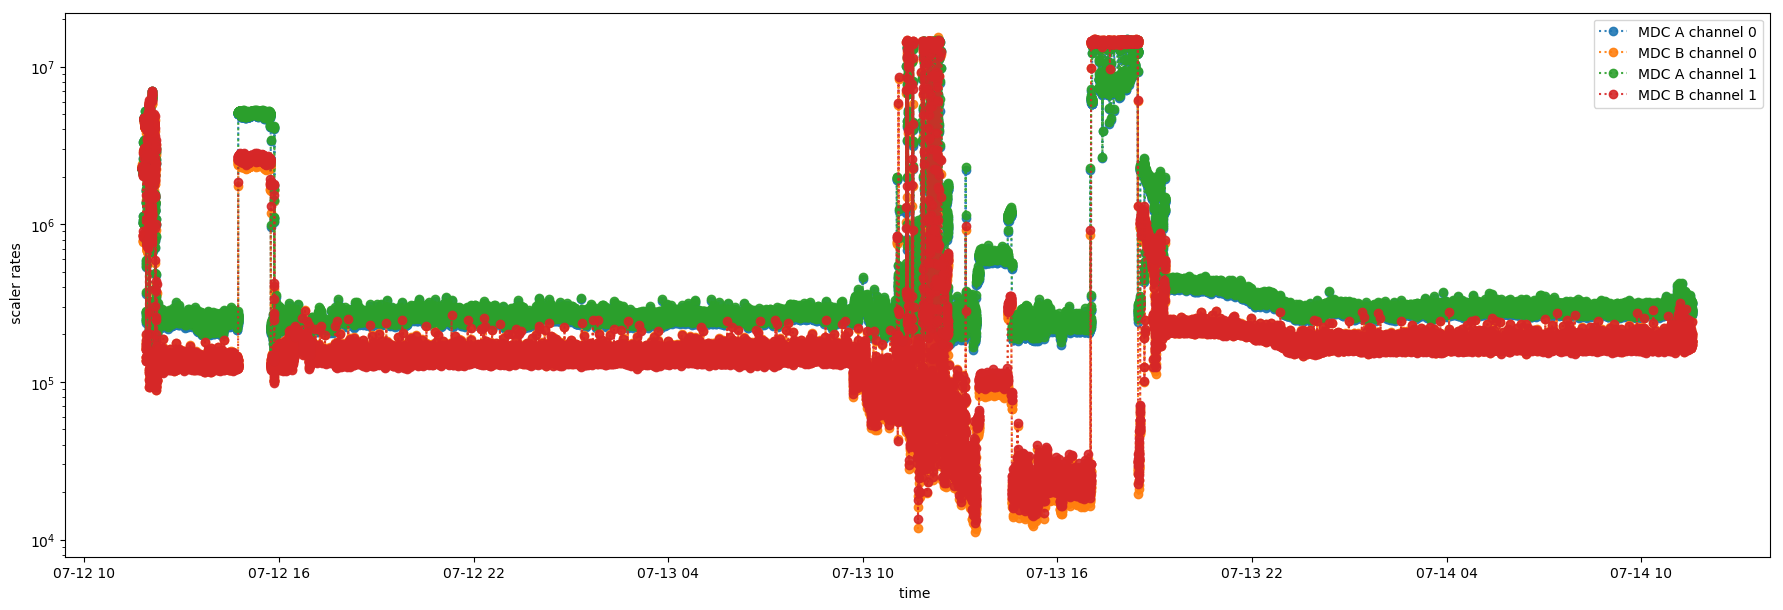

In [ ]:
scaler_trend_plot("0x0350",[48,49],10)

In [1]:

 




def scaler_trend_plot(TDC,channellist,trend_duration):
    trend_scan_Nsteps = 60*60*trend_duration
    data_dir = "/workdir/jupyter/Dlab_2021_tot_data_taking_data"
    TDC_list = ["0x1801","0x1802"]
    #time of one measurement in s
    measure_time=1
    # measure_board_list =  [ "0902", "0905"]  
    measure_board_list =  [ "0902"]
    channellist = [48,49]
    number_of_TDC_channels  =2
    tdc_channels = list(range(0, number_of_TDC_channels))

    from matplotlib import pyplot as plt
    %matplotlib inline
    from IPython.display import clear_output

    import time
    import matplotlib.dates as mdates
    import datetime 
    # from cw_pasttrec_functions import *

    import tdc_daq as td

    starttime = round(time.time() * 1000) 
    print(starttime)
    # get scaler rates for chosen threshold/gain/peaking time as simple estimate of noise:
    scaler_list_trend        =  [ []  for i in range(trend_scan_Nsteps) ] 

    scaler_list_trend_channel = [ []  for i in range(len(channellist))]
    scaler_list_trend_channel_MDC = [ [[]  for i in range(len(tdc_channels))] for itdc in range(0,len(TDC_list))]
    scaler_list_trend_channel_MDCA = [ []  for i in range(len(tdc_channels))]
    scaler_list_trend_channel_MDCB = [ []  for i in range(len(tdc_channels))]
    timestamps = []


    for b in range(0,len(measure_board_list)):
     name = measure_board_list[b]
     for p in range(0,trend_scan_Nsteps):
#             scaler_rates = td.scaler_rate_of_board(name,measure_time) 
            scaler_rates = td.scaler_rate("0x0350",channellist,1)
            scaler_rates_MDCA = td.scaler_rate("0x1801",tdc_channels,1)
            scaler_rates_MDCB = td.scaler_rate("0x1802",tdc_channels,1)        
            #print(scaler_rates)
 
            for ch in range(0,len(scaler_rates)):
                scaler_list_trend_channel[ch] += [ scaler_rates[ch] ]
            #for itdc in range(0,len(TDC_list)):
            for ch in range(0,len(scaler_rates_MDCA)):
#                scaler_list_trend_channel_MDC[itdc][ch] += [ td.scaler_rate(TDC_list[itdc],tdc_channels,1)[ch] ]   
                scaler_list_trend_channel_MDCA[ch] += [ scaler_rates_MDCA[ch] ]  
            for ch in range(0,len(scaler_rates_MDCB)):
                scaler_list_trend_channel_MDCB[ch] += [ scaler_rates_MDCB[ch] ]  
            timestamps += [ datetime.datetime.now() ]
            print(".", end=" ")
            ###########################################################
            ####plot trends each 5 minutes:
 
            plt.figure(num=None, figsize=(22, 8), dpi=100, facecolor='w', edgecolor='k')      
            plt.gcf().autofmt_xdate()
                            
            if p % 3 == 0:
                        # now call function we defined above

                        clear_output(wait=True)
 

                        #for ch in range(0,len(channellist)):                           
                            #plt.errorbar( timestamps,scaler_list_trend_channel[ch],  yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "scintillator ch {:d}".format(channellist[ch]) )
                        for ch in range(0,2): 
                            plt.errorbar( timestamps,scaler_list_trend_channel_MDCA[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "MDC A channel {:d}".format(tdc_channels[ch]))                            
                            plt.errorbar( timestamps,scaler_list_trend_channel_MDCB[ch], yerr=None, xerr=None, fmt='o:', alpha=0.9,label = "MDC B channel {:d}".format(tdc_channels[ch]))                            
 
                            # beautify the x-labels
                        plt.xlabel("time ")
                        plt.yscale('log')
                        plt.ylabel(" scaler rates") 
                        plt.savefig('{:s}/MBO_rate_trend{:d}.png'.format(data_dir,starttime), dpi=100)
                        plt.legend()  
                        plt.show()
                        
  
 